In [1]:
#%autosave 0
from IPython.core.display import HTML, display
display(HTML('<style>.container { width:100%; !important } </style>'))

In [2]:
import graphviz as gv

The function $\texttt{toDot}(\texttt{Parent})$ takes a dictionary $\texttt{Parent}$.
For every node $x$, $\texttt{Parent}[x]$ is the parent of $x$.   It draws this dictionary 
as a family tree using `graphviz`.

In [3]:
def toDot(Parent):
    dot = gv.Digraph(node_attr={'shape': 'record', 'style': 'rounded'})
    M  = Parent.keys()
    M |= { Parent[x] for x in M }
    for x in M:
        dot.node(str(x), label=str(x))
    for x in M:
        p = Parent[x]
        if x != p:
            dot.edge(str(x), str(p))
    return dot

# A Tree Based Implementation of the Union-Find Algorithm

Given a set $M$ and a binary relation $R \subseteq M \times M$, the function $\texttt{union_find}$ returns a partition $\mathcal{P}$ of $M$ such that we have
$$ \forall \langle x, y \rangle \in R: \exists S \in \mathcal{P}: \bigl(x \in S \wedge y \in S\bigr) $$

In [4]:
def union_find(M, R):
    Parent = { x: x for x in M } 
    Height = { x: 1 for x in M }
    for x, y in R:
        print(f'{x} ≅ {y}')
        root_x = find(x, Parent)
        root_y = find(y, Parent)
        if root_x != root_y:
            if Height[root_x] < Height[root_y]:
                Parent[root_x] = root_y
            elif Height[root_x] > Height[root_y]:
                Parent[root_y] = root_x
            else:
                Parent[root_y]  = root_x
                Height[root_x] += 1
            display(toDot(Parent))
    Roots = { x for x in M if Parent[x] == x }
    return [{y for y in M if find(y, Parent) == r} for r in Roots]
        

Given a dictionary `Parent` and an element $x$ from $M$, the function $\texttt{find}(x, \texttt{Parent})$ 
returns the ancestor of $x$ that is its own parent.

In [5]:
def find(x, Parent):
    if Parent[x] == x:
        return x
    return find(Parent[x], Parent)

In [6]:
def demo():
    M = set(range(1, 10))
    R = { (1, 4), (7, 9), (3, 5), (2, 6), (5, 8), (1, 9), (4, 7) }
    P = union_find(M, R)
    return P

4 ≅ 7


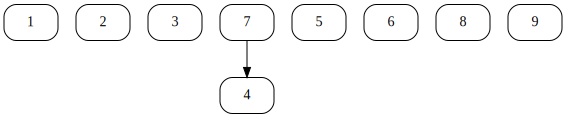

2 ≅ 6


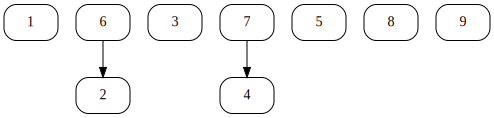

7 ≅ 9


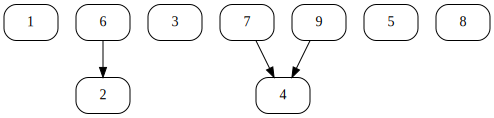

1 ≅ 4


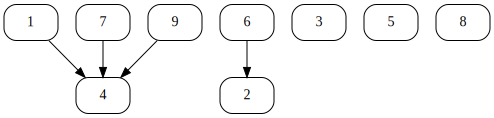

1 ≅ 9
5 ≅ 8


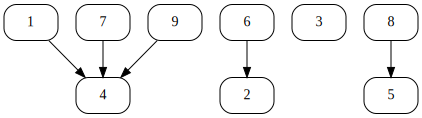

3 ≅ 5


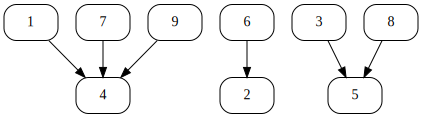

[{2, 6}, {1, 4, 7, 9}, {3, 5, 8}]

In [7]:
demo()

In [8]:
def worst_case(n):
    M = set(range(1, n+1))
    R = [ (k+1, k) for k in M if k < n ]
    print(f'R = {R}')
    P = union_find(M, R)
    print(f'P = {P}')

R = [(2, 1), (3, 2), (4, 3), (5, 4), (6, 5), (7, 6), (8, 7), (9, 8), (10, 9)]
2 ≅ 1


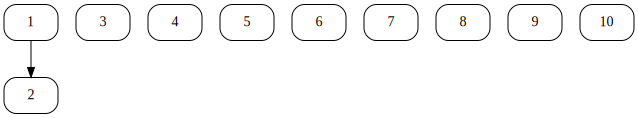

3 ≅ 2


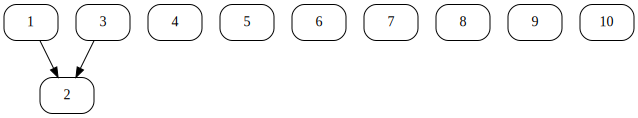

4 ≅ 3


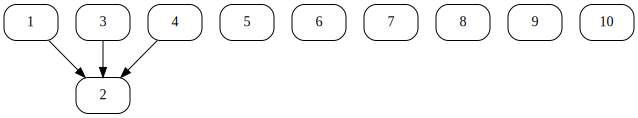

5 ≅ 4


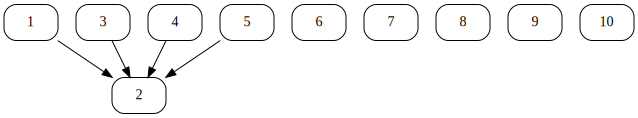

6 ≅ 5


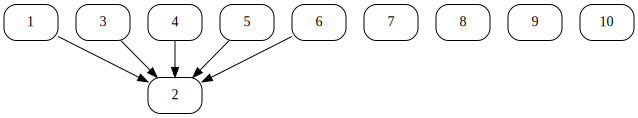

7 ≅ 6


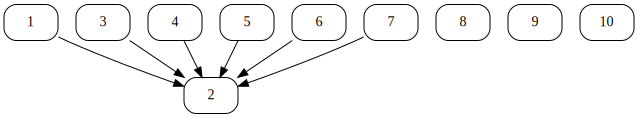

8 ≅ 7


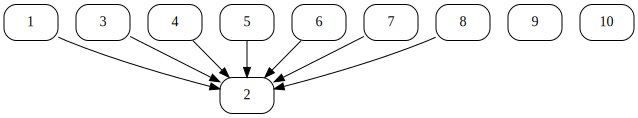

9 ≅ 8


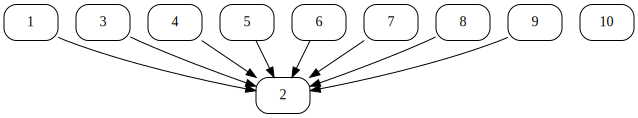

10 ≅ 9


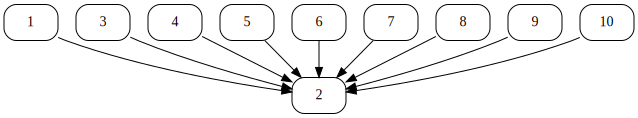

P = [{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}]


In [9]:
worst_case(10)

In [10]:
import random as rnd

In [11]:
def random_demo(m, n):
    M = set(range(n))
    R = { (rnd.randrange(n), rnd.randrange(n)) for k in range(m) }
    union_find(M, R)

49 ≅ 37


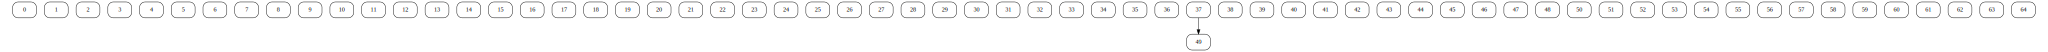

11 ≅ 49


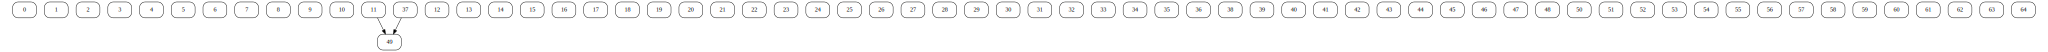

53 ≅ 15


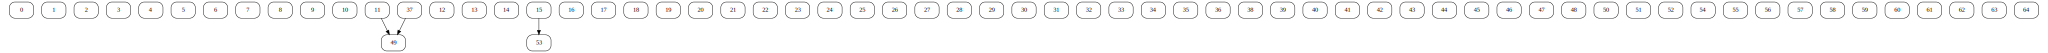

37 ≅ 16


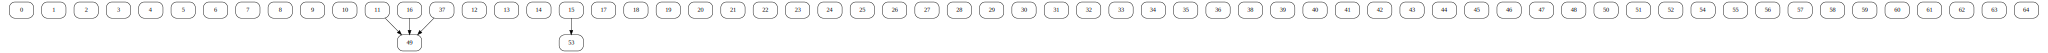

23 ≅ 55


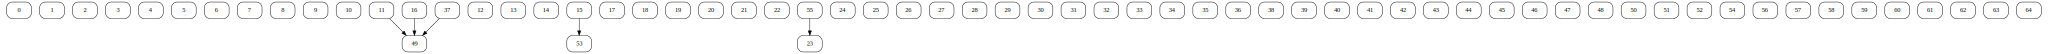

31 ≅ 26


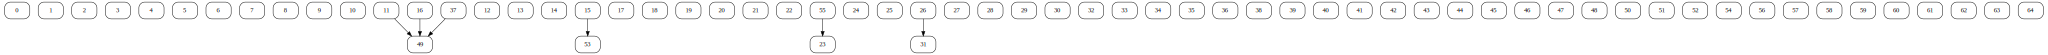

59 ≅ 45


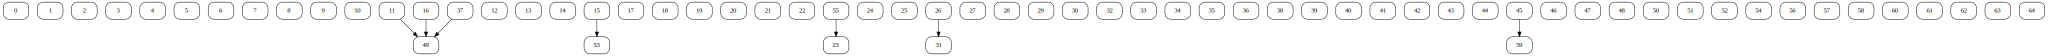

63 ≅ 47


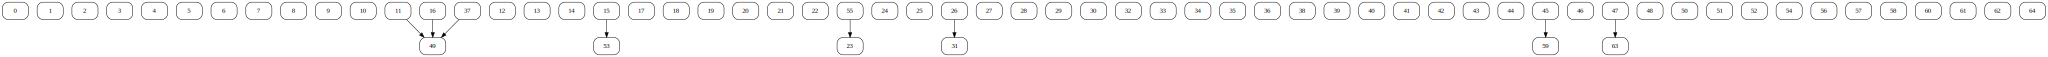

59 ≅ 7


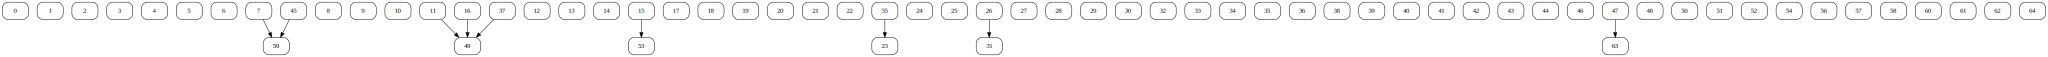

10 ≅ 46


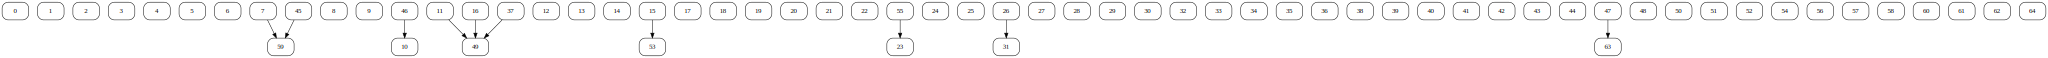

60 ≅ 52


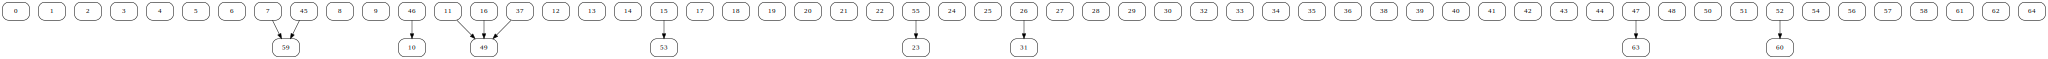

15 ≅ 8


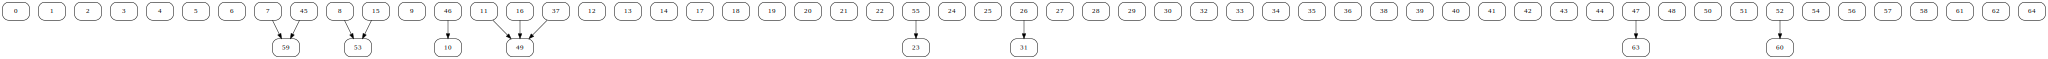

59 ≅ 36


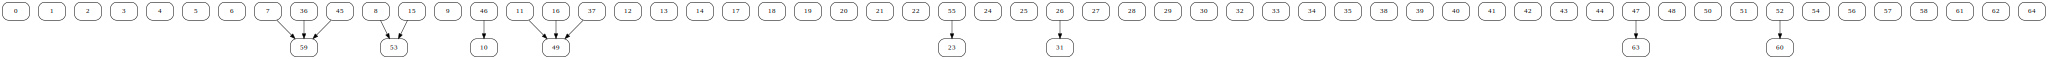

52 ≅ 40


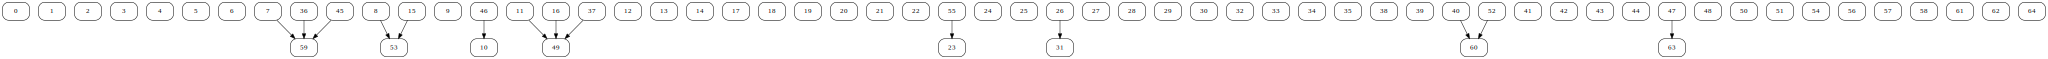

51 ≅ 23


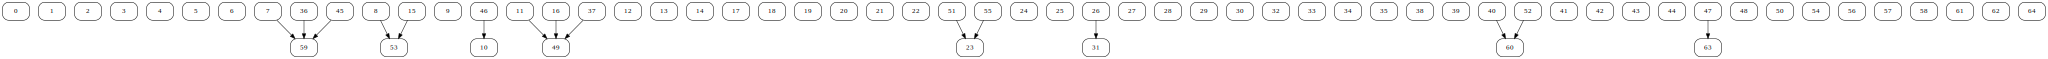

51 ≅ 1


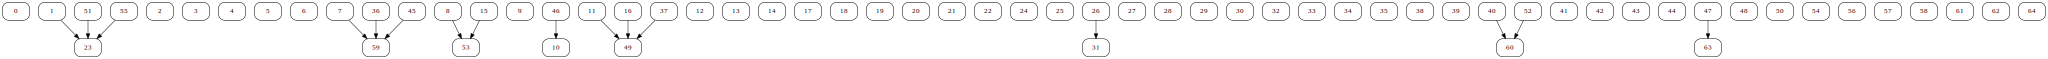

17 ≅ 15


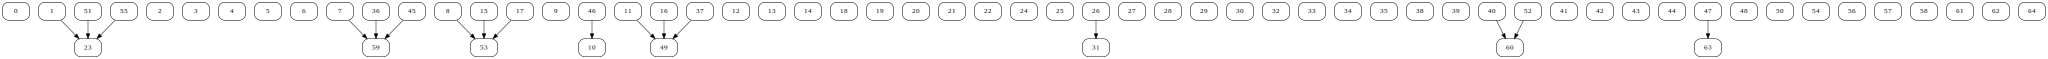

39 ≅ 41


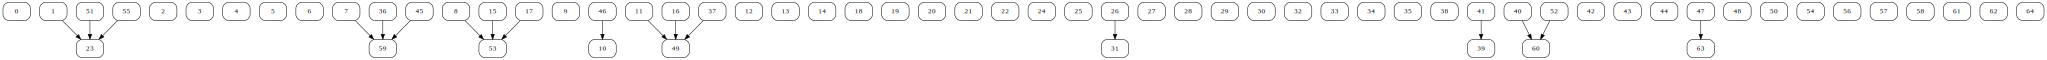

0 ≅ 54


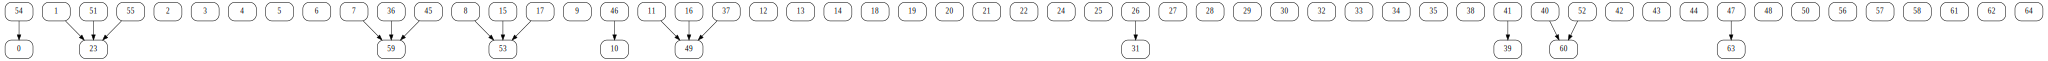

8 ≅ 24


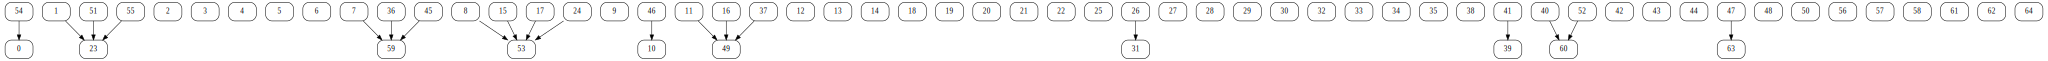

36 ≅ 8


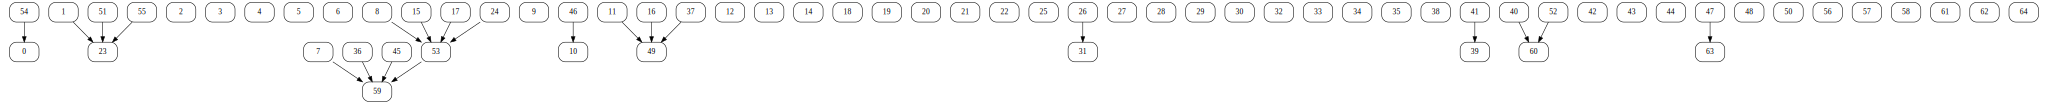

50 ≅ 15


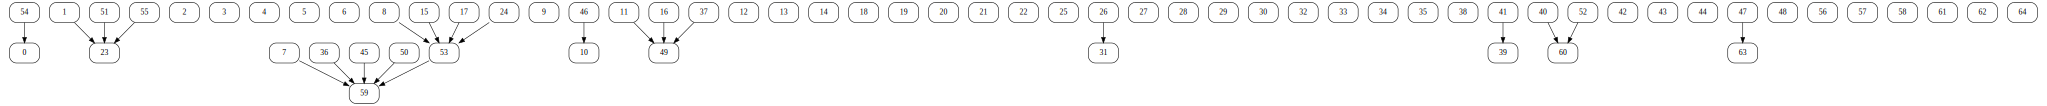

3 ≅ 10


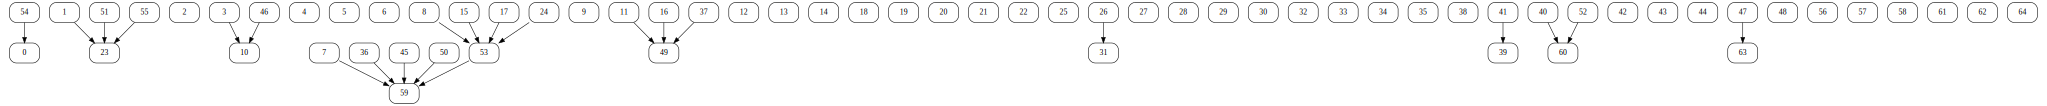

46 ≅ 57


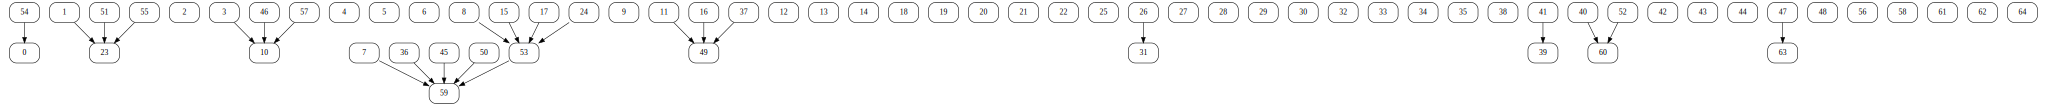

2 ≅ 52


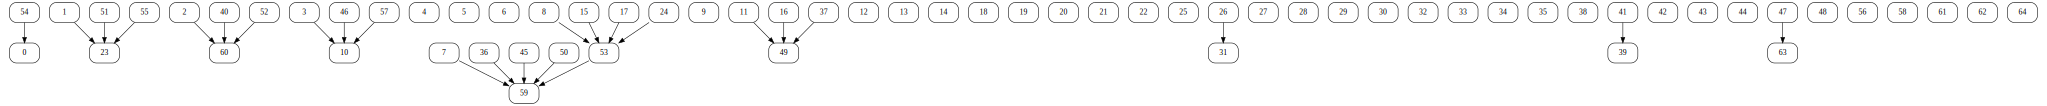

18 ≅ 49


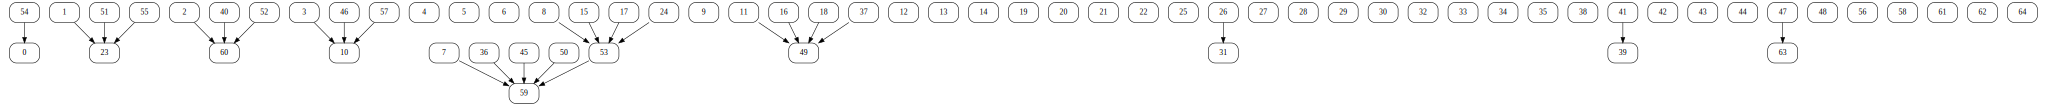

26 ≅ 41


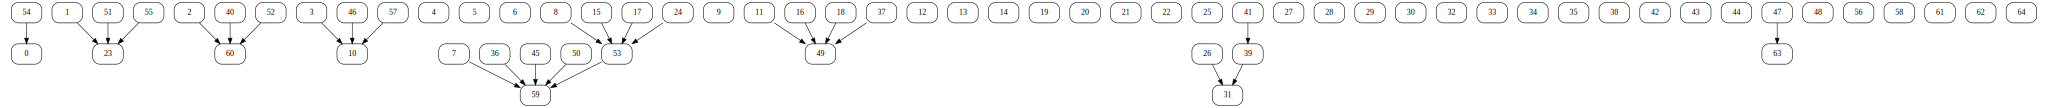

25 ≅ 22


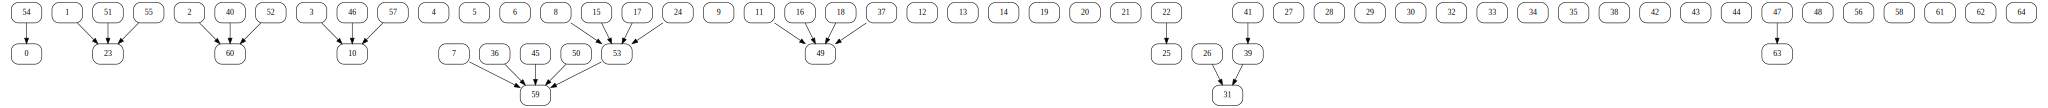

1 ≅ 1
45 ≅ 21


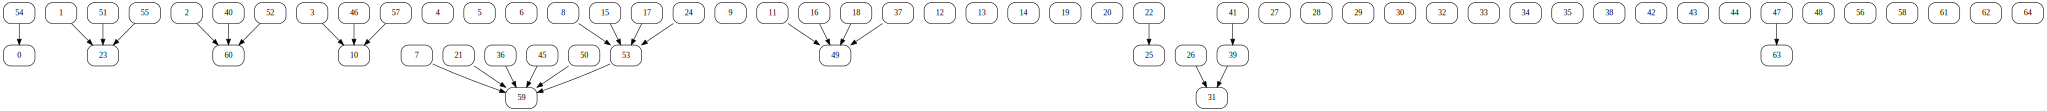

17 ≅ 50
10 ≅ 4


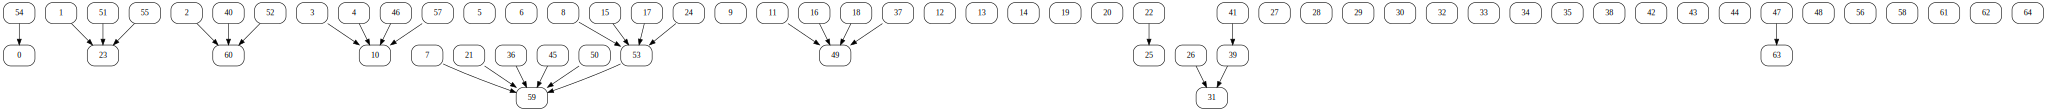

30 ≅ 53


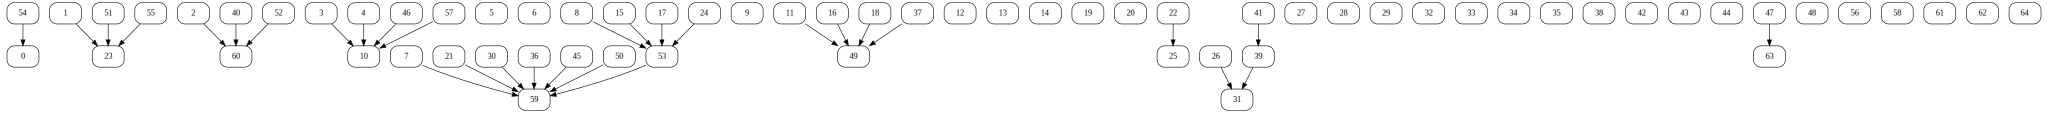

41 ≅ 52


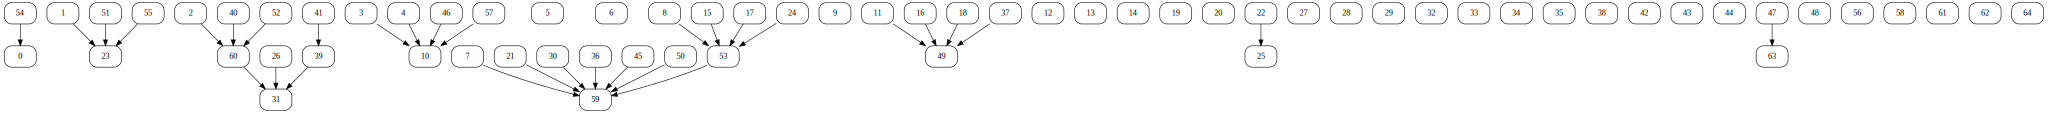

49 ≅ 39


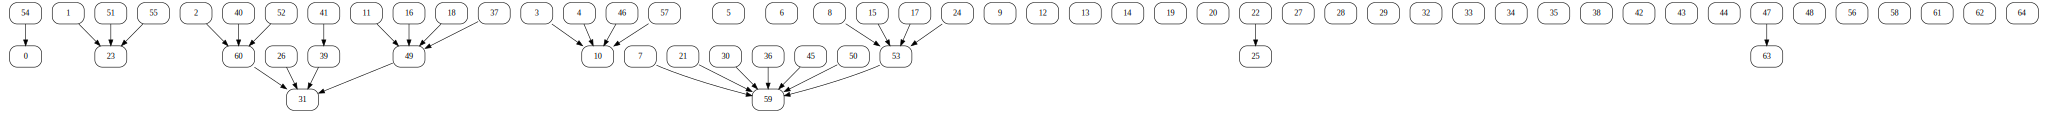

59 ≅ 47


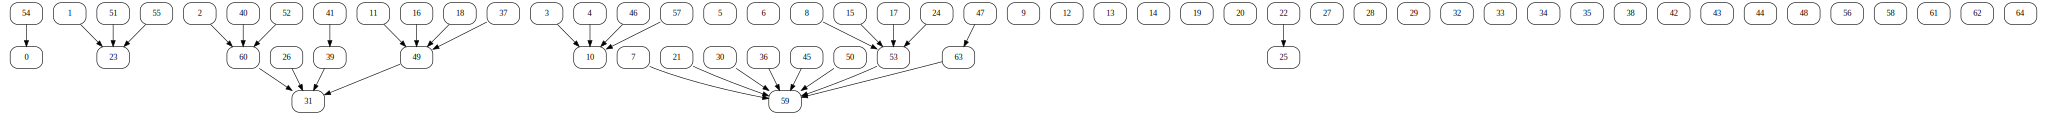

20 ≅ 31


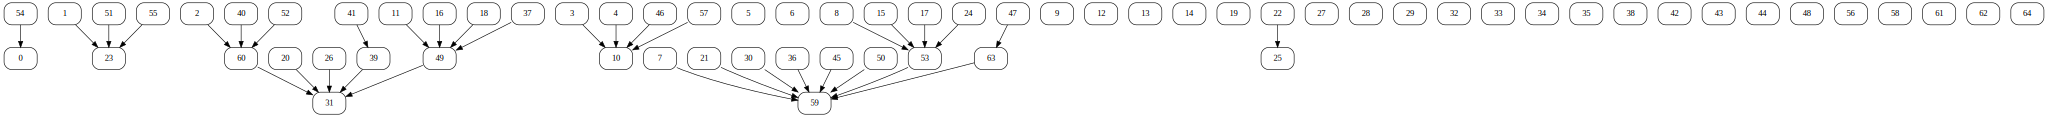

37 ≅ 12


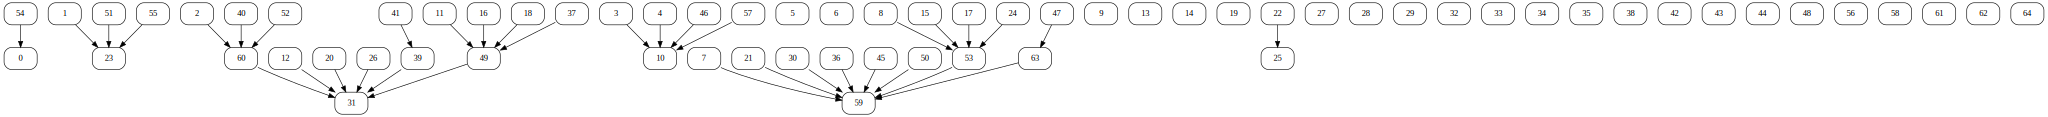

37 ≅ 18
9 ≅ 3


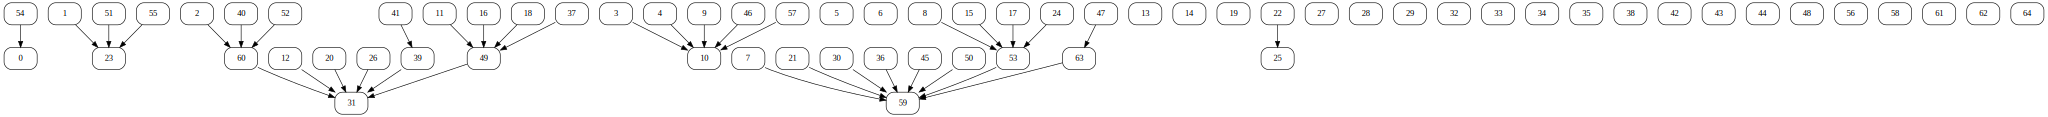

18 ≅ 17


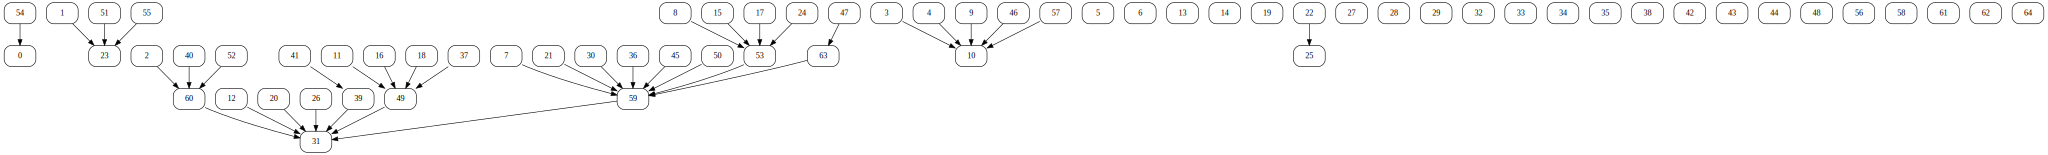

41 ≅ 28


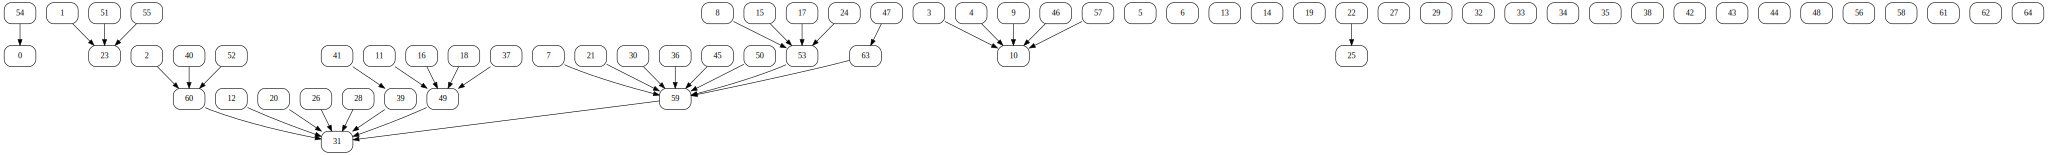

34 ≅ 64


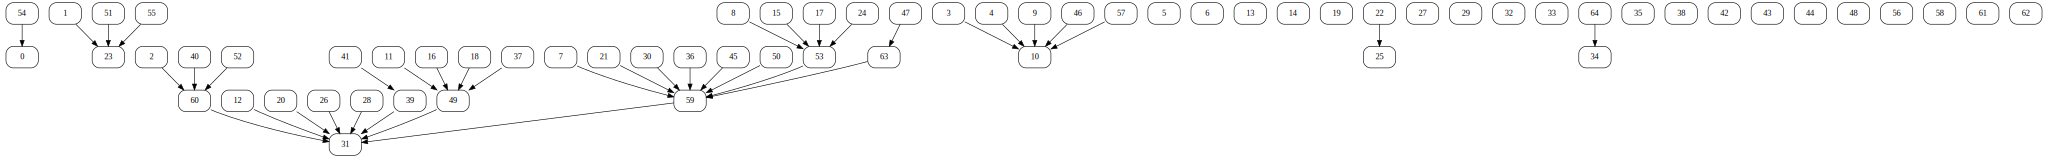

38 ≅ 25


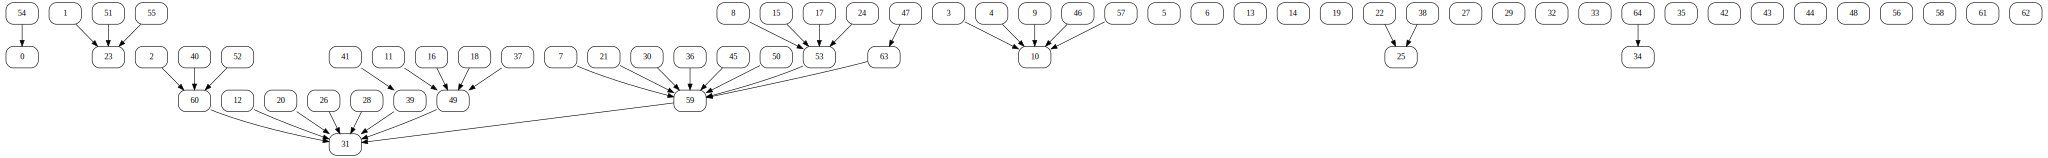

37 ≅ 25


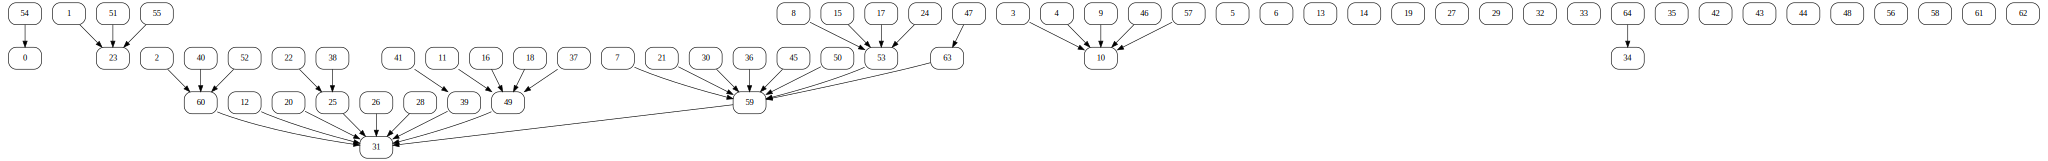

32 ≅ 11


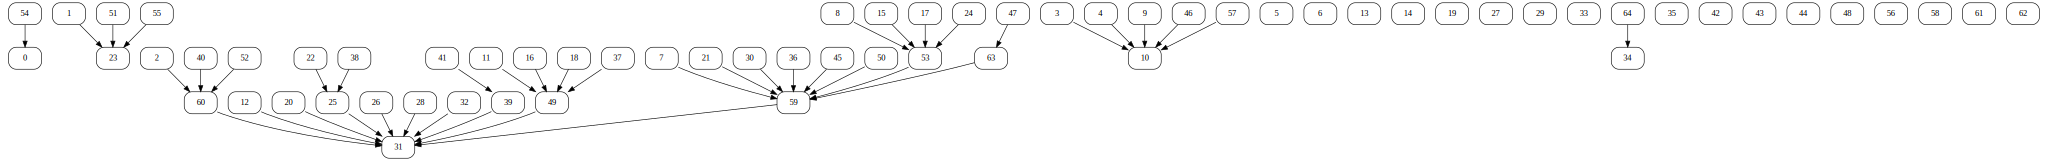

9 ≅ 49


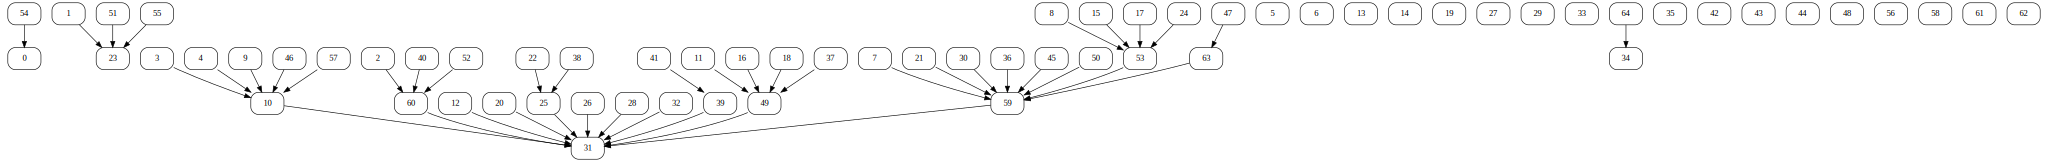

50 ≅ 31
40 ≅ 6


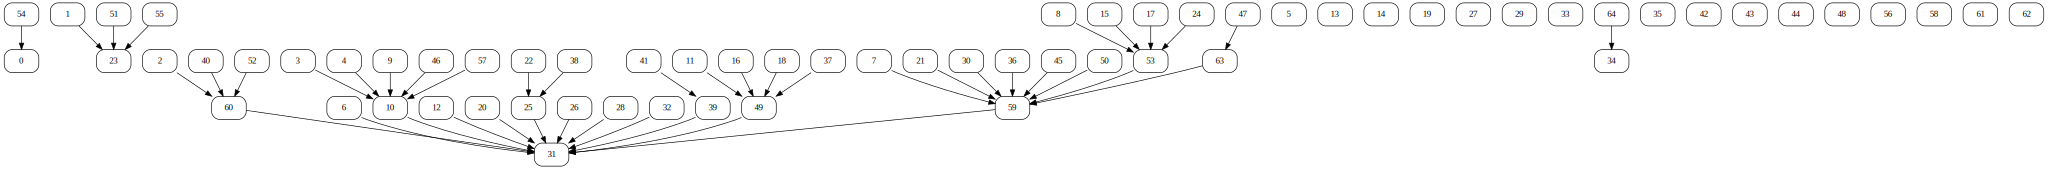

21 ≅ 44


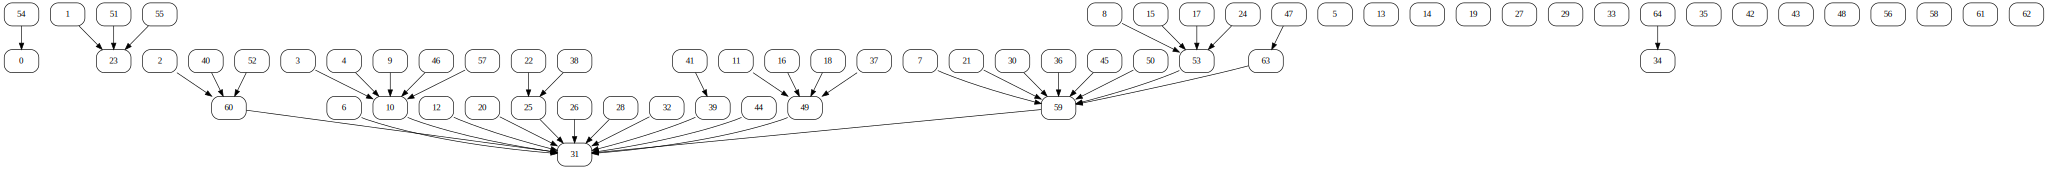

20 ≅ 5


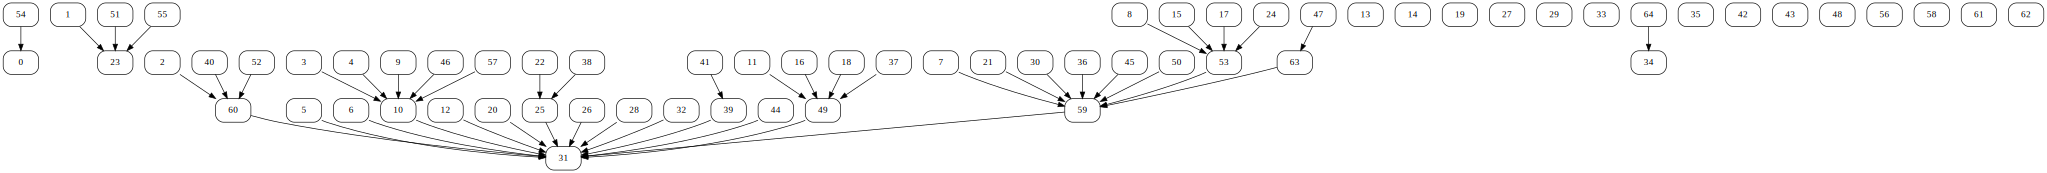

52 ≅ 22
46 ≅ 37
61 ≅ 21


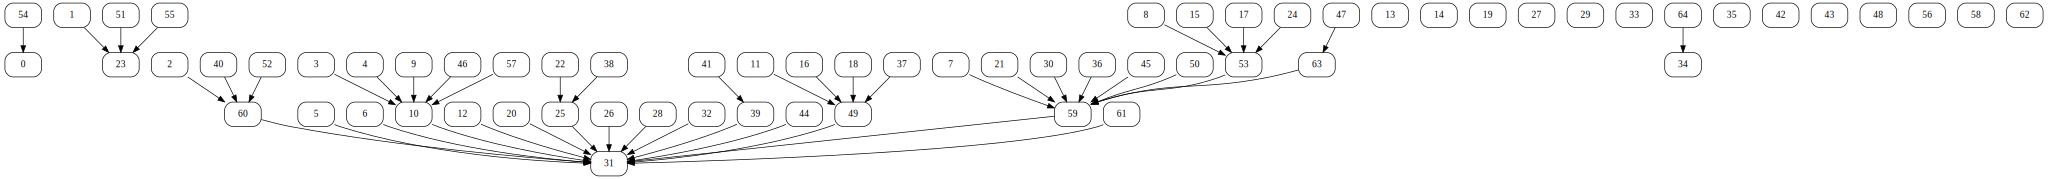

19 ≅ 56


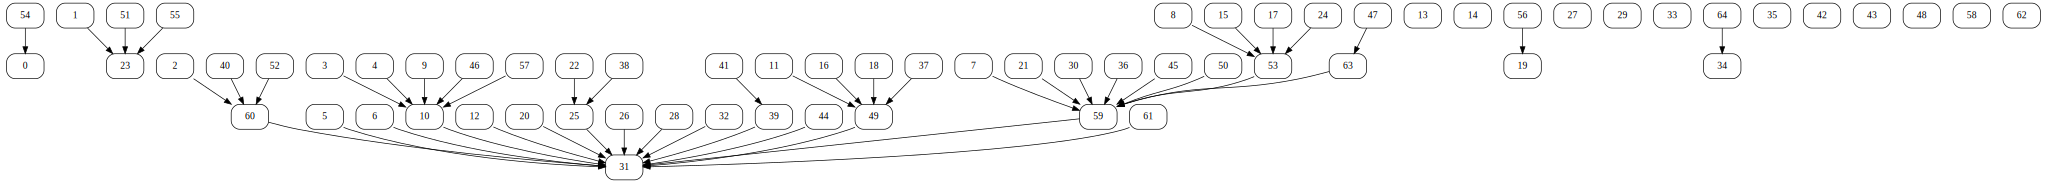

19 ≅ 30


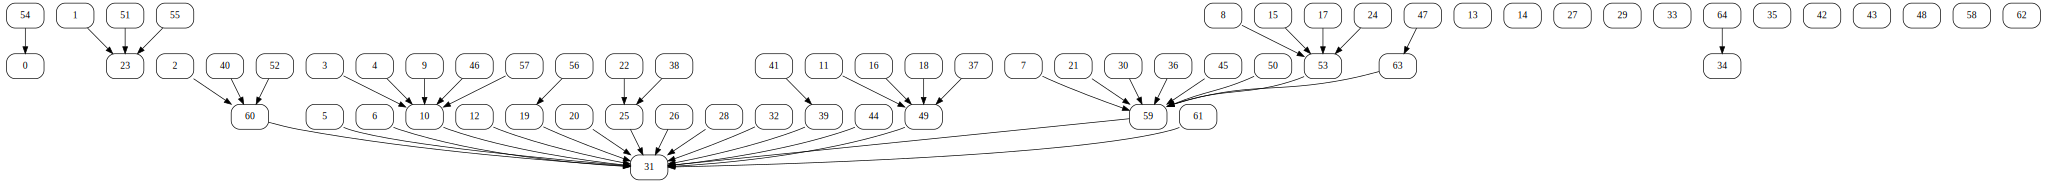

44 ≅ 55


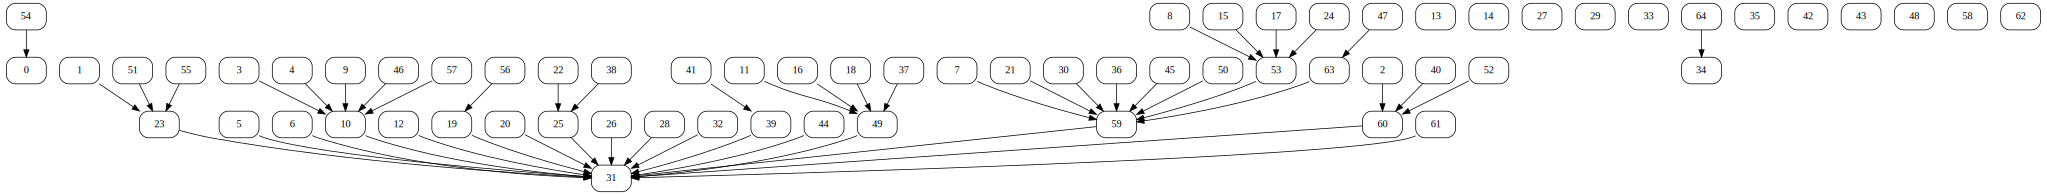

30 ≅ 50
21 ≅ 24
42 ≅ 34


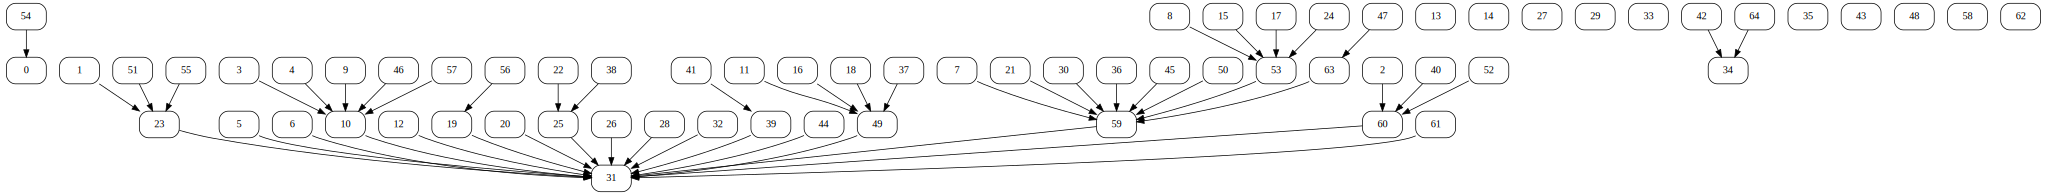

In [13]:
random_demo(60, 65)